# Plotting a pretty map

Sometimes you want topographic or sattelite imagery for your plots. This short notebook will demonstrate how to:

1. Make a basic map and use cartopy stock image
2. Use shaded relief images within cartopy and satellite images from the free ArcGIS service
3. Annotate maps with symbols, text, or arrows

# Import modules

Let's import some modules we will use in this notebook.

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Plot a basemap

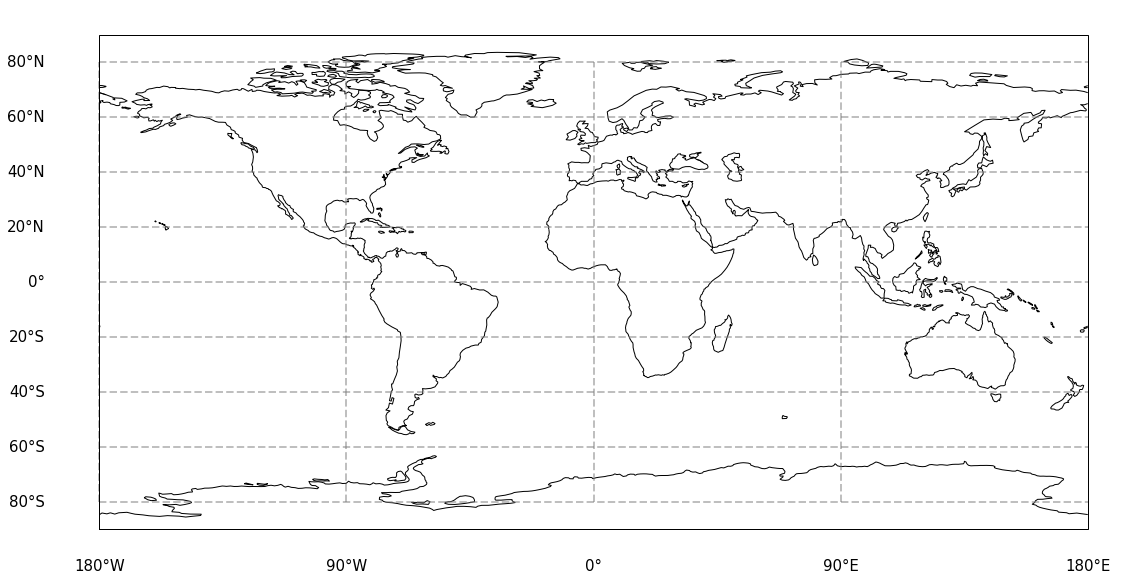

In [2]:
fig, ax = plt.subplots(1,figsize=(20,10))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=2                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                          # where labels shouldn't be
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])        # sets longitude tick marks
gl.ylocator = mticker.FixedLocator(np.arange(80,-81,-20))          # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER
       
gl.xlabel_style = {'size': 15}                                     # change label font sizes
gl.ylabel_style = {'size': 15}

This map is sort of boring. You could add color using the add_feature attribute, but Cartopy has a stock image you can use as a basemap. So let's plot that.

# Stock image

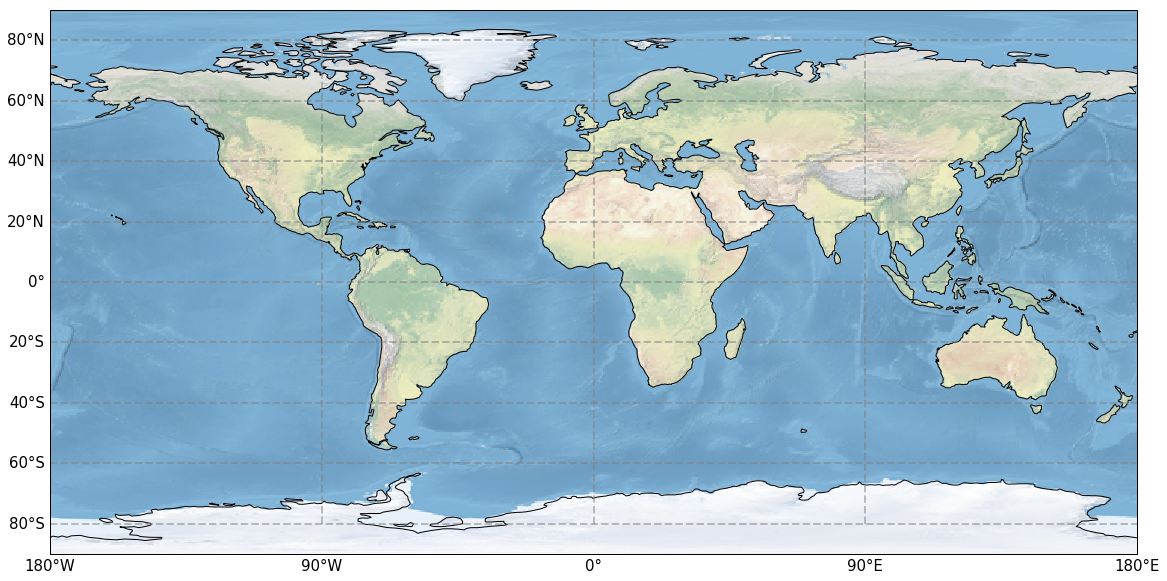

In [3]:
fig, ax = plt.subplots(1,figsize=(20,10))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
ax.stock_img()                                  # plot the stock image

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=2                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                          # where labels shouldn't be
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])        # sets longitude tick marks
gl.ylocator = mticker.FixedLocator(np.arange(80,-81,-20))          # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER
             
gl.xlabel_style = {'size': 15}                                     # change label font sizes
gl.ylabel_style = {'size': 15}

That looks pretty good. This is one image that cartopy has available. It is quick and easy to implement though maybe not so appealing to the eye, especially if we zoom in. 

See below for a zoom in of Southern California.

/home/john/anaconda3/envs/cartopy/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


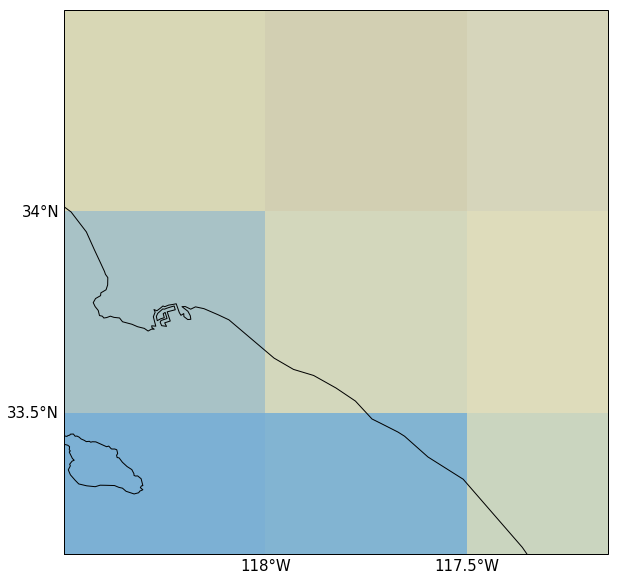

In [4]:
fig, ax = plt.subplots(1,figsize=(10,10))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='10m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
ax.stock_img()                                  # plot the stock image

llcrnrlon, llcrnrlat = (-118.5, 33.15)                       # lower left corner longitude/latitude
urcrnrlon, urcrnrlat = (-117.15, 34.5)                       # upper right corner longitude/latitude

ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat])  # set the bounds of the image

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True                           # label coordinates
                , linewidth=0                                # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                    # where labels shouldn't be
gl.xlocator = mticker.FixedLocator([-118, -117.5])           # sets longitude tick marks
gl.ylocator = mticker.FixedLocator([33.5, 34])               # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                          # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                               # change label font sizes
gl.ylabel_style = {'size': 15}

The resolution of the coastlines is impressive but the resolution of the stock image is not good. =(

Instead, let's try to plot a shaded relief and terrain image from map image tiles cartopy has in its repository. First, we need to import cartopy image tiles and create a class to read the ArcGIS ESRI images.

# Import cartopy tiles

In [5]:
import cartopy.io.img_tiles as cimgt
from cartopy.io.img_tiles import GoogleTiles

class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url

Now we will plot a shaded relief tile of Southern California.

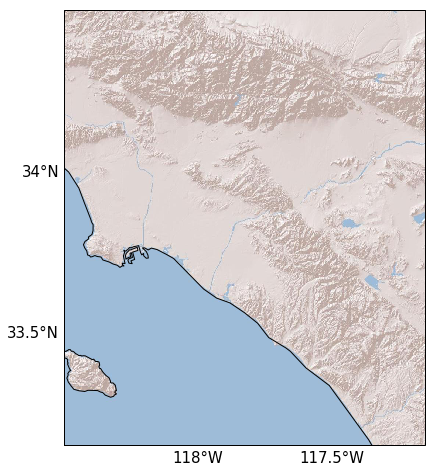

In [6]:
fig, ax = plt.subplots(1,figsize=(8,8))

ax = plt.axes(projection=ShadedReliefESRI().crs)

llcrnrlon, llcrnrlat = (-118.5, 33.15)                       # lower left corner longitude/latitude
urcrnrlon, urcrnrlat = (-117.15, 34.5)                       # upper right corner longitude/latitude

ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat])  # set the bounds of the image

resolution = 10
ax.add_image(ShadedReliefESRI(), resolution)                 # plot the image

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True                           # label coordinates
                , linewidth=0                                # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                    # where labels shouldn't be
gl.xlocator = mticker.FixedLocator([-118, -117.5])           # sets longitude tick marks
gl.ylocator = mticker.FixedLocator([33.5, 34])               # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                          # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                               # change label font sizes
gl.ylabel_style = {'size': 15}

ax.coastlines(resolution='10m')                              # the level of resolution to render the drawings, 
                                                             # see documentation for more details


This shaded relief image looks a lot better than the stock image. We can even add that high resolution coastline on top. Currently, resolutions available are "110m", "50m", and "10m" but choose wisely. A higher resolution (e.g. 10m) will take longer processing time. For more info on acquiring higher resolution images, see [this page](https://ocefpaf.github.io/python4oceanographers/blog/2015/06/22/osm/) for a nice review of options.

Now, let's plot a basemap of terrain.

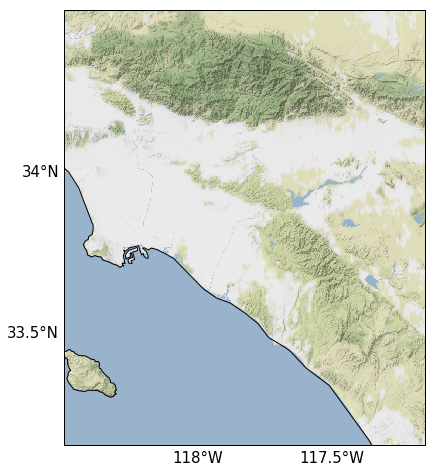

In [7]:
fig, ax = plt.subplots(1,figsize=(8,8))

stamen_terrain = cimgt.StamenTerrain()                       # create a stamen terrain instance

ax = plt.axes(projection=stamen_terrain.crs)                 # create a GeoAxes in the tile's projection.

llcrnrlon, llcrnrlat = (-118.5, 33.15)                       # lower left corner longitude/latitude
urcrnrlon, urcrnrlat = (-117.15, 34.5)                       # upper right corner longitude/latitude

ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat])  # set the bounds of the image

resolution = 10
ax.add_image(stamen_terrain, resolution)                     # plot the image

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True                           # label coordinates
                , linewidth=0                                # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                    # where labels shouldn't be
gl.xlocator = mticker.FixedLocator([-118, -117.5])           # sets longitude tick marks
gl.ylocator = mticker.FixedLocator([33.5, 34])               # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                          # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                               # change label font sizes
gl.ylabel_style = {'size': 15}

ax.coastlines(resolution='10m')                              # the level of resolution to render the drawings, 
                                                             # see documentation for more details
    


Now, that's very pretty! Look at that topography! But maybe we could use some of the ESRI satellite imagery instead?!


# ArcGIS satellite images

This takes a little more work, but it is possible.

First, we need to build a url for querying the ArcGIS ESRI satellite image database. We will create a definition (aka function) for this. 

This function is reusable and can be called later on for a different set of coordinates.

In [8]:
# function
def ERSI_url_builder(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat):
    
    ''' This function returns a url for querying the ArcGIS
    ESRI satellite image database based on the lower left
    coordinate and upper right coordinate provided.''' 
    
    url = 'http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=%.2f,%.2f,%.2f,%.2f&bboxSR=4269&imageSR=4269&size=2000,2200&dpi=96&format=png32&f=image' % (llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat)
    
    return url

Second, we need to import a Python url reading/request module. We also need the io module to a create file-like object in memory and the Image module for handling the image.

In [9]:
import urllib
import io
from PIL import Image

Okay, now we are ready to set up our basemap.

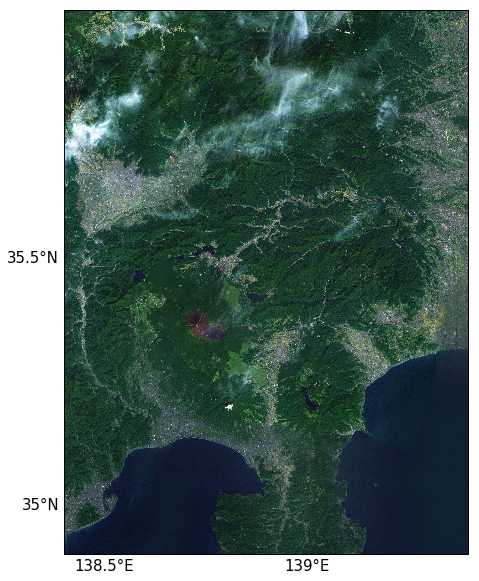

In [10]:
fig, ax = plt.subplots(1,figsize=(20,10))

proj = ccrs.Mercator()                         # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

llcrnrlon, llcrnrlat = (138.4, 34.9)            # lower left coordinate
urcrnrlon, urcrnrlat = (139.4, 36)              # upper right coordinate

URL = ERSI_url_builder(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat)        # url builder definition created above

with urllib.request.urlopen(URL) as url:                               # read the url
    f = io.BytesIO(url.read())

img = Image.open(f)                                                    # open the image

extents = proj.transform_points(ccrs.Geodetic(),                       # tranform image bounds into projection
                                np.array([llcrnrlon, urcrnrlon]),
                                np.array([llcrnrlat, urcrnrlat]))

img_extents = (extents[0][0], extents[1][0]                            # gather the transformed image bounds
             , extents[0][1], extents[1][1])  

ax.imshow(img, origin='upper', extent=img_extents, transform=proj)     # plot the image obtained from the url

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True                           # label coordinates
                , linewidth=0                                # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                    # where labels shouldn't be
gl.xlocator = mticker.FixedLocator(np.arange(138.5,139.6,0.5))           # sets longitude tick marks
gl.ylocator = mticker.FixedLocator(np.arange(35,36.1,0.5))               # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                          # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                               # change label font sizes
gl.ylabel_style = {'size': 15}

Wow. So lush. Much green. 

In the newest version of cartopy, developers have added a background_img( ) method, that allows users to add their own background images in a more convenient way. However, it requires a little more work in the backend. If you are interested in how to do this, see http://earthpy.org/tag/cartopy.html.

But where is Mt. Fuji? Let's annotate our map with text and an arrow that points to Mt. Fuji.

# Annotating a map

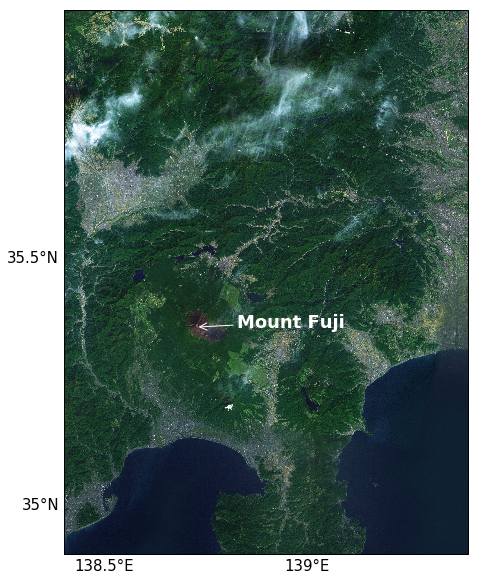

In [11]:
fig, ax = plt.subplots(1,figsize=(20,10))

proj = ccrs.Mercator()                         # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

llcrnrlon, llcrnrlat = (138.4, 34.9)            # lower left coordinate
urcrnrlon, urcrnrlat = (139.4, 36)              # upper right coordinate

URL = ERSI_url_builder(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat)        # url builder definition created above

with urllib.request.urlopen(URL) as url:                               # read the url
    f = io.BytesIO(url.read())

img = Image.open(f)                                                    # open the image

extents = proj.transform_points(ccrs.Geodetic(),                       # tranform image bounds into projection
                                np.array([llcrnrlon, urcrnrlon]),
                                np.array([llcrnrlat, urcrnrlat]))

img_extents = (extents[0][0], extents[1][0]                            # gather the transformed image bounds
             , extents[0][1], extents[1][1])  

ax.imshow(img, origin='upper', extent=img_extents, transform=proj)     # plot the image obtained from the url

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True                           # label coordinates
                , linewidth=0                                # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                    # where labels shouldn't be
gl.xlocator = mticker.FixedLocator(np.arange(138.5,139.6,0.5))           # sets longitude tick marks
gl.ylocator = mticker.FixedLocator(np.arange(35,36.1,0.5))               # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                          # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                               # change label font sizes
gl.ylabel_style = {'size': 15}

mt_fuji = (138.7278, 35.3606)

x1, y1 = mt_fuji
x2, y2 = (mt_fuji[0]+.1, mt_fuji[1])                        # coordinate for tail
                                     # coordinate for arrow head

transform = ccrs.PlateCarree()._as_mpl_transform(ax)         # coordinate system for plotting the arrow

ax.annotate('Mount Fuji'                                     # add the arrow with text, follows matplotlib
            , xy=(x1,y1)                                     # arrow head location
            , xytext=(x2, y2)                                # arrow tail location
            , xycoords=transform                             # coordinate system to plot the arrow in
            , size=18                                        # text size
            , fontweight='bold'                              # font weight
            , color='white'                                  # font color
            , arrowprops=dict(arrowstyle="->"                # arrow properties
                              , color='white')) 

# Have your own image you want use?

This example is taken from: http://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html

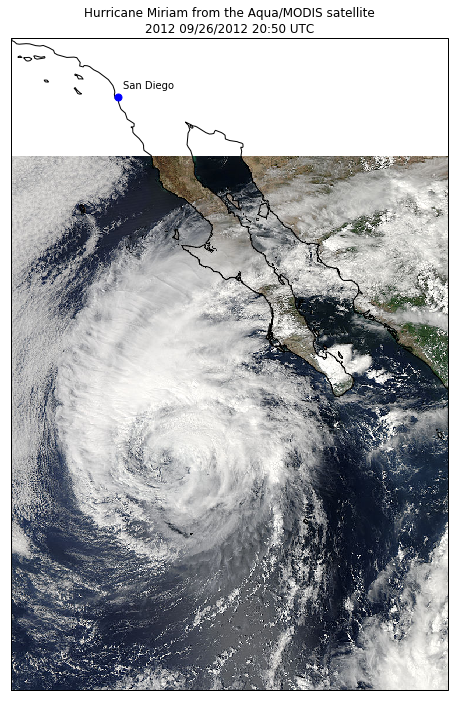

In [12]:
import os                                                               # import other modules needed
from cartopy import config

fig = plt.figure(figsize=(8, 12))

fname = os.path.join(config["repo_data_dir"],                           # get the path of the file. This one is in the repo data directory.
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg' # you could have your own path here instead.
                     )
llcrnrlon, llcrnrlat = (-120.67660000000001, 13.2301484511245)          # bounds of the image
urcrnrlon, urcrnrlat = (-106.32104523100001, 30.766899999999502)

img_extent = (llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat)               # extent of the image
img = plt.imread(fname)                                                 # read the image

ax = plt.axes(projection=ccrs.PlateCarree())                            # set the projection

plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'            # give the figure a title
          '2012 09/26/2012 20:50 UTC')

ax.set_xmargin(0.05)                                                    # set a margin around the data
ax.set_ymargin(0.10)

ax.imshow(img                                                           # add the image. 
          , origin='upper'                                              # Because this image was a tif, 
          , extent=img_extent                                           # the "origin" of the image is in the
          , transform=ccrs.PlateCarree())                               # upper left corner

ax.coastlines(resolution='50m', color='black', linewidth=1)             # add coastlines

ax.plot(-117.1625, 32.715                                               # mark a known place to help us geo-locate ourselves
        , 'bo'
        , markersize=7
        , transform=ccrs.Geodetic()) 

ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())